Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3462 - val_loss: 0.1629
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1532 - val_loss: 0.1278
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1238 - val_loss: 0.1083
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1063 - val_loss: 0.0970
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0961 - val_loss: 0.0896
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0892 - val_loss: 0.0848
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0849 - val_loss: 0.0815
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0817 - val_loss: 0.0793
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0796 - val_loss: 0.0777
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0781 - val_loss: 0.0765
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0770 - val_loss: 0.0757
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

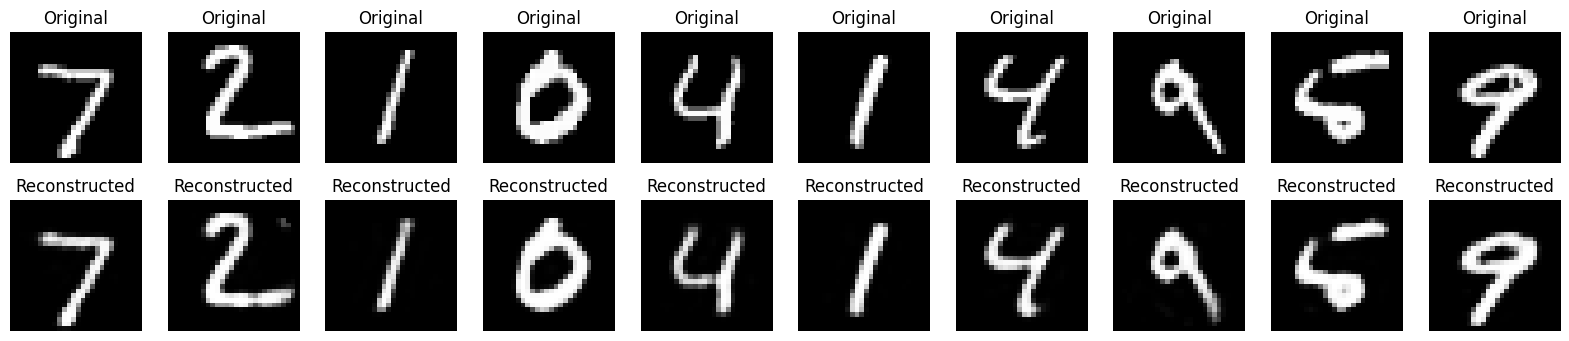

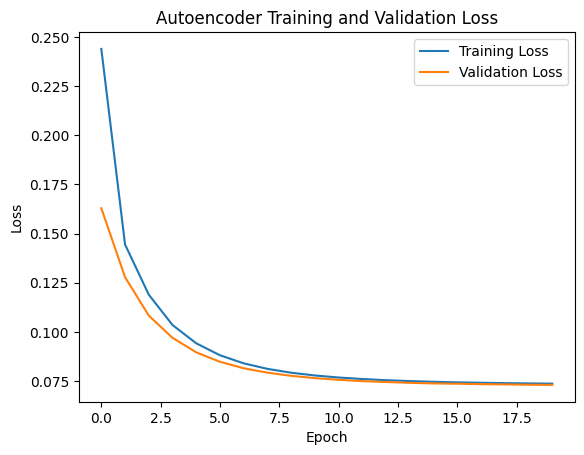

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam

# Load the MNIST dataset
(X_train, _), (X_test, _) = mnist.load_data()

# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the data for fully connected autoencoder
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# Define the dimensions of the autoencoder
input_dim = X_train.shape[1]  # 28x28 = 784
encoding_dim = 64  # Dimensionality of the encoded space

# Build the autoencoder model
# Encoder
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, 
                          epochs=20, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_data=(X_test, X_test))

# Encode and decode some images
decoded_imgs = autoencoder.predict(X_test)

# Reshape the images back to 28x28 for visualization
X_test_reshaped = X_test.reshape((X_test.shape[0], 28, 28))
decoded_imgs_reshaped = decoded_imgs.reshape((decoded_imgs.shape[0], 28, 28))

# Plot original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_reshaped[i], cmap="gray")
    plt.title("Original")
    plt.axis("off")
    
    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_reshaped[i], cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Autoencoder Training and Validation Loss')
plt.show()
